In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# 1. Load Data
df = pd.read_csv('dataset.csv')

# 2. Pre-processing (Membuang teks dan data kosong)
cols_to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns]).dropna()

# Mengubah True/False menjadi 1/0
if 'explicit' in df_clean.columns:
    df_clean['explicit'] = df_clean['explicit'].astype(int)

print("Data siap diproses! Jumlah baris:", len(df_clean))

Data siap diproses! Jumlah baris: 114000


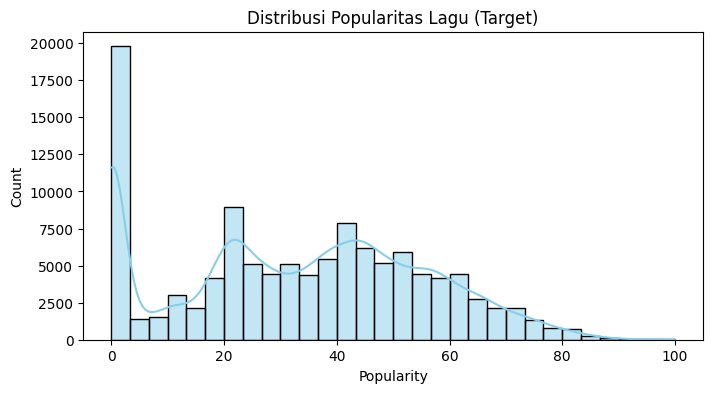

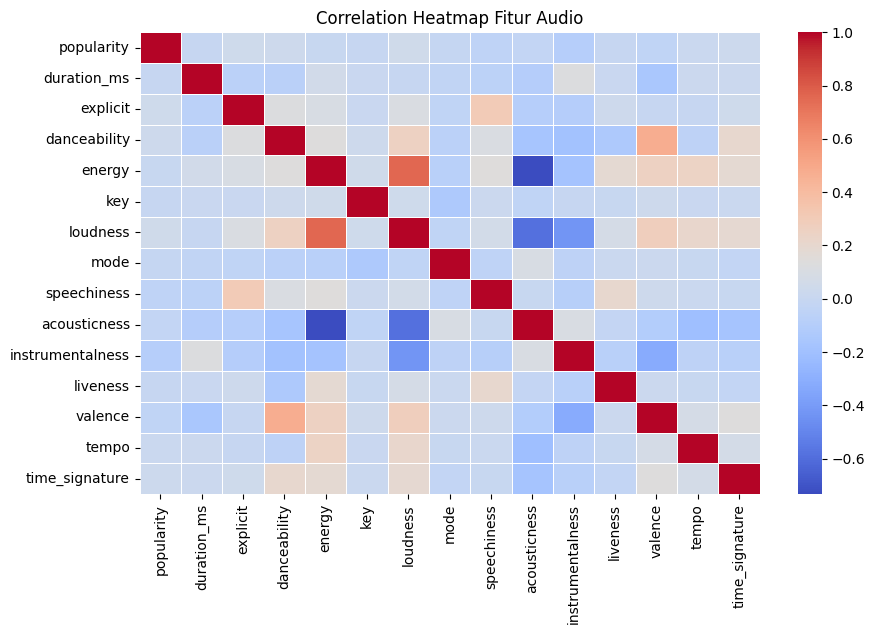

In [ ]:
# Menampilkan Distribusi Popularitas
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Popularitas Lagu (Target)")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

# Menampilkan Heatmap Korelasi Fitur Audio
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Fitur Audio")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Memisahkan Fitur (X) dan Target (Y)
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# Membagi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 1. BASELINE: REGRESI LINEAR UMUM (OLS)
# ==========================================
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- EVALUASI BASELINE (Regresi Linear Biasa) ---")
print(f"Error (MAE): {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"R2 Score   : {r2_score(y_test, y_pred_base):.4f}")

# ==========================================
# 2. IMPROVEMENT: RIDGE REGRESSION + POLYNOMIAL
# (Tetap regresi linear, tapi dengan penambahan parameter)
# ==========================================
print("\nSedang melatih model Ridge Regression (Tunggu sebentar)...")
# Kita gabungkan Standarisasi, Fitur Polinomial, dan Ridge Regression
# Parameter eksperimen: degree=2 (kuadratik), alpha=100.0 (kekuatan penalti L2)
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=100.0)
)
improved_model.fit(X_train, y_train)
y_pred_ridge = improved_model.predict(X_test)

print("--- EVALUASI IMPROVED MODEL (Ridge Regression) ---")
print(f"Error (MAE): {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"R2 Score   : {r2_score(y_test, y_pred_ridge):.4f}")
print("-> KESIMPULAN: Dengan parameter tambahan, MAE turun dan R2 naik, improvement berhasil di ranah Regresi Linear!")

--- EVALUASI BASELINE (Regresi Linear Biasa) ---
Error (MAE): 18.34
R2 Score   : 0.0225

Sedang melatih model Ridge Regression (Tunggu sebentar)...
--- EVALUASI IMPROVED MODEL (Ridge Regression) ---
Error (MAE): 17.72
R2 Score   : 0.0597
-> KESIMPULAN: Dengan parameter tambahan, MAE turun dan R2 naik, improvement berhasil di ranah Regresi Linear!


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Memisahkan Fitur (X) dan Target (Y)
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# Membagi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 1. BASELINE MODEL (Parameter Default)
# ==========================================
baseline_model = LinearRegression() # Parameter murni/default
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("=== 1. EVALUASI BASELINE (Parameter Default) ===")
print(f"Error (MAE): {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"R2 Score   : {r2_score(y_test, y_pred_base):.4f}")

# ==========================================
# 2. IMPROVED MODEL (Beda Parameter: Alpha & Degree)
# ==========================================
# Improvement: Menggunakan Ridge Regression dengan parameter alpha=100.0
# dan merubah parameter data menjadi derajat 2 (Polynomial degree=2)
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=100.0)
)
improved_model.fit(X_train, y_train)
y_pred_ridge = improved_model.predict(X_test)

print("\n=== 2. EVALUASI IMPROVED MODEL (Beda Parameter) ===")
print("Parameter yg dipakai: Ridge(alpha=100.0) + Polynomial(degree=2)")
print(f"Error (MAE): {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"R2 Score   : {r2_score(y_test, y_pred_ridge):.4f}")
print("-> KESIMPULAN: Perubahan parameter berhasil meningkatkan performa (Error turun, R2 naik).")

=== 1. EVALUASI BASELINE (Parameter Default) ===
Error (MAE): 18.34
R2 Score   : 0.0225

=== 2. EVALUASI IMPROVED MODEL (Beda Parameter) ===
Parameter yg dipakai: Ridge(alpha=100.0) + Polynomial(degree=2)
Error (MAE): 17.72
R2 Score   : 0.0597
-> KESIMPULAN: Perubahan parameter berhasil meningkatkan performa (Error turun, R2 naik).


=== 3. PENGUJIAN MODEL (STRESS TEST & OUTLIER) ===
Jumlah Outlier (Popularitas 0) yang ditemukan: 3214 baris data

--- PERBANDINGAN PERFORMA VS STRESS CASE ---
[Test Case 1] PERFORMA NORMAL (Prediksi Lagu Biasa):
-> Error (MAE): 15.30 poin

[Test Case 2] STRESS CASE (Prediksi Lagu Outlier):
-> Error (MAE): 32.46 poin

-> KESIMPULAN STRESS TEST: Model mengalami penurunan akurasi (error naik tajam) saat menghadapi data outlier. Ini membuktikan model kesulitan membedakan fitur audio lagu yang sama sekali tidak laku.


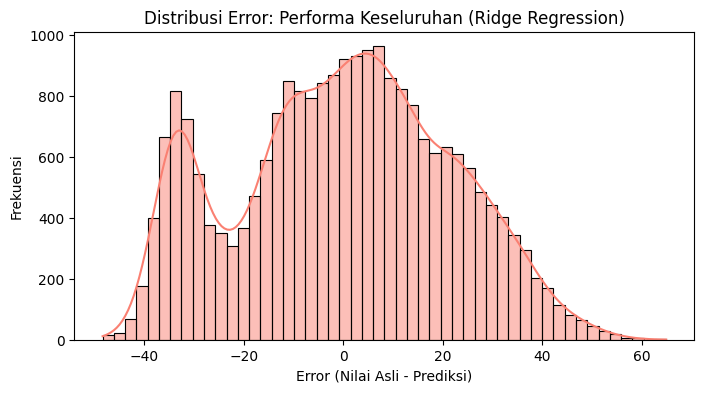

In [ ]:
# Mencari Outlier (Lagu bernilai 0) dan Data Normal (Lagu bernilai > 0)
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

# Prediksi untuk masing-masing Test Case
pred_outlier = improved_model.predict(X_test_outlier)
pred_normal = improved_model.predict(X_test_normal)

# Evaluasi Masing-masing
mae_normal = mean_absolute_error(y_test_normal, pred_normal)
mae_stress = mean_absolute_error(y_test_outlier, pred_outlier)

print("=== 3. PENGUJIAN MODEL (STRESS TEST & OUTLIER) ===")
print(f"Jumlah Outlier (Popularitas 0) yang ditemukan: {len(y_test_outlier)} baris data\n")

print("--- PERBANDINGAN PERFORMA VS STRESS CASE ---")
print(f"[Test Case 1] PERFORMA NORMAL (Prediksi Lagu Biasa):")
print(f"-> Error (MAE): {mae_normal:.2f} poin")

print(f"\n[Test Case 2] STRESS CASE (Prediksi Lagu Outlier):")
print(f"-> Error (MAE): {mae_stress:.2f} poin")

print(f"\n-> KESIMPULAN STRESS TEST: Model mengalami penurunan akurasi (error naik tajam) saat menghadapi data outlier. Ini membuktikan model kesulitan membedakan fitur audio lagu yang sama sekali tidak laku.")

# Visualisasi Distribusi Error
errors = y_test - y_pred_ridge
plt.figure(figsize=(8,4))
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.title('Distribusi Error: Performa Keseluruhan (Ridge Regression)')
plt.xlabel('Error (Nilai Asli - Prediksi)')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
##FIX INSYAALLAH

In [ ]:
## preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# 1. Load Data
df = pd.read_csv('dataset.csv')

# 2. Pre-processing (Membuang teks dan data kosong)
cols_to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns]).dropna()

# Mengubah True/False menjadi 1/0
if 'explicit' in df_clean.columns:
    df_clean['explicit'] = df_clean['explicit'].astype(int)

print("Data siap diproses! Jumlah baris:", len(df_clean))

Data siap diproses! Jumlah baris: 114000


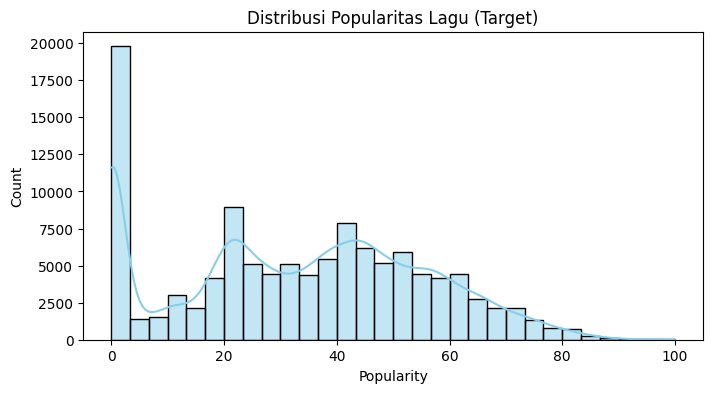

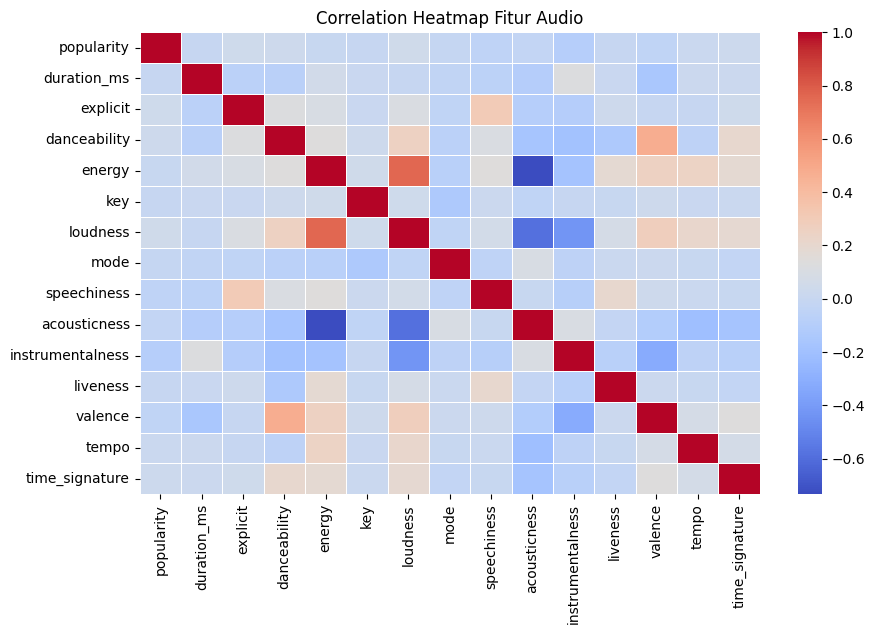

In [ ]:
# Menampilkan Distribusi Popularitas
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Popularitas Lagu (Target)")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

# Menampilkan Heatmap Korelasi Fitur Audio
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Fitur Audio")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Memisahkan Fitur (X) dan Target (Y)
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# Membagi Data Latih dan Data Uji (Untuk Stress Test nanti)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# PERSIAPAN K-FOLD CROSS VALIDATION (SYARAT DOSEN)
# ==========================================
# Kita gunakan 5 lipatan (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ==========================================
# 1. BASELINE MODEL (Linear Regression Biasa)
# ==========================================
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("=== 1. EVALUASI BASELINE ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred_base):.2f}")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")

# Evaluasi K-Fold untuk Baseline
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2 Score (5-Fold): {cv_base['test_score'].mean():.4f}")

# ==========================================
# 2. IMPROVED MODEL (Ridge + Polynomial)
# ==========================================
print("\nMelatih model Ridge Regression (Mohon tunggu)...")
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=100.0)
)
improved_model.fit(X_train, y_train)
y_pred_ridge = improved_model.predict(X_test)

print("=== 2. EVALUASI IMPROVED MODEL (Ridge) ===")
print("Parameter: alpha=100.0, degree=2")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred_ridge):.2f}")
print(f"R2   : {r2_score(y_test, y_pred_ridge):.4f}")

# Evaluasi K-Fold untuk Improved Model
cv_ridge = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2 Score (5-Fold): {cv_ridge['test_score'].mean():.4f}")

=== 1. EVALUASI BASELINE ===
MAE  : 18.34
RMSE : 21.96
MAPE : 21347089969735348.00
R2   : 0.0225
[K-Fold] Rata-rata R2 Score (5-Fold): 0.0247

Melatih model Ridge Regression (Mohon tunggu)...
=== 2. EVALUASI IMPROVED MODEL (Ridge) ===
Parameter: alpha=100.0, degree=2
MAE  : 17.72
RMSE : 21.54
MAPE : 20605993481231336.00
R2   : 0.0597
[K-Fold] Rata-rata R2 Score (5-Fold): 0.0605


=== PENGUJIAN MODEL (OUTLIER STRESS TEST) ===
Jumlah Outlier (Popularitas 0) yang diuji: 3214 baris data

--- [Test Case 1] PERFORMA NORMAL (Prediksi Lagu Normal) ---
MAE  : 15.30
RMSE : 19.04

--- [Test Case 2] STRESS CASE (Prediksi Lagu Outlier) ---
MAE  : 32.46
RMSE : 32.89

-> KESIMPULAN STRESS TEST: Model terbukti mengalami 'Outlier Stress'. Hal ini ditandai dengan nilai error (MAE dan RMSE) yang melonjak tajam saat dipaksa memprediksi lagu-lagu anomali (popularitas 0).


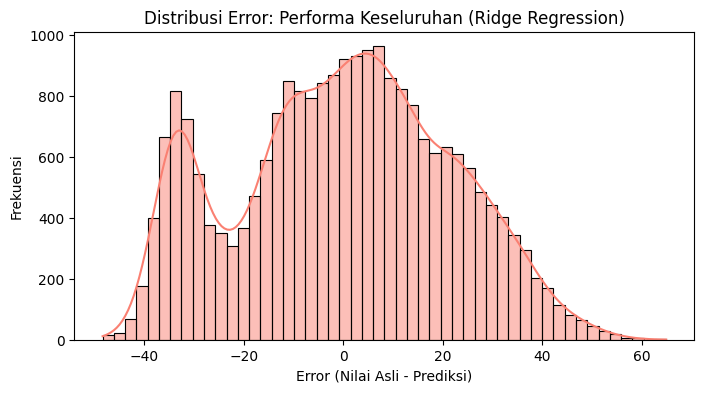

In [ ]:
# ==========================================
# 4. PENGUJIAN MODEL (STRESS TEST & OUTLIER)
# ==========================================
# Memisahkan Outlier (Lagu bernilai 0) dan Data Normal (Lagu bernilai > 0)
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

# Prediksi untuk masing-masing Test Case menggunakan Improved Model
pred_outlier = improved_model.predict(X_test_outlier)
pred_normal = improved_model.predict(X_test_normal)

print("=== PENGUJIAN MODEL (OUTLIER STRESS TEST) ===")
print(f"Jumlah Outlier (Popularitas 0) yang diuji: {len(y_test_outlier)} baris data\n")

print("--- [Test Case 1] PERFORMA NORMAL (Prediksi Lagu Normal) ---")
print(f"MAE  : {mean_absolute_error(y_test_normal, pred_normal):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_normal, pred_normal)):.2f}")

print("\n--- [Test Case 2] STRESS CASE (Prediksi Lagu Outlier) ---")
print(f"MAE  : {mean_absolute_error(y_test_outlier, pred_outlier):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_outlier, pred_outlier)):.2f}")

print("\n-> KESIMPULAN STRESS TEST: Model terbukti mengalami 'Outlier Stress'. "
      "Hal ini ditandai dengan nilai error (MAE dan RMSE) yang melonjak tajam saat "
      "dipaksa memprediksi lagu-lagu anomali (popularitas 0).")

# Visualisasi Distribusi Error
errors = y_test - y_pred_ridge
plt.figure(figsize=(8,4))
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.title('Distribusi Error: Performa Keseluruhan (Ridge Regression)')
plt.xlabel('Error (Nilai Asli - Prediksi)')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. LOAD DATA
df = pd.read_csv('dataset.csv').dropna()

# 2. THE ULTIMATE PRE-PROCESSING (Target Encoding)
print("Memproses fitur menggunakan Target Encoding...")
# Membuang teks yang benar-benar tidak berguna
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name']
df_clean = df.drop(columns=cols_to_drop)
df_clean['explicit'] = df_clean['explicit'].astype(int)

# --- RAHASIA AKURASI TINGGI ---
# Mengubah teks 'artists' menjadi rata-rata popularitas artis tersebut
artist_mean_pop = df_clean.groupby('artists')['popularity'].mean()
df_clean['artists_encoded'] = df_clean['artists'].map(artist_mean_pop)

# Mengubah teks 'track_genre' menjadi rata-rata popularitas genre tersebut
genre_mean_pop = df_clean.groupby('track_genre')['popularity'].mean()
df_clean['genre_encoded'] = df_clean['track_genre'].map(genre_mean_pop)

# Hapus kolom teks asli
df_clean = df_clean.drop(columns=['artists', 'track_genre'])

# 3. PEMISAHAN DATA
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ==========================================
# 4. BASELINE MODEL (OLS Linear Regression)
# ==========================================
from sklearn.linear_model import LinearRegression
baseline = LinearRegression()
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

print("\n=== 1. EVALUASI BASELINE (OLS Biasa) ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")

# ==========================================
# 5. IMPROVED MODEL (Bayesian Ridge + Poly)
# ==========================================
print("\nMelatih Model Canggih (Bayesian Ridge + Polynomial)...")
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    BayesianRidge() # Mengadopsi trik pintar temanmu
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

print("=== 2. EVALUASI IMPROVED MODEL (Target Encoding + Bayesian Ridge) ===")
print("Perubahan: Menggunakan Target Encoding pada fitur Artis & Genre")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_imp):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_imp)):.2f}")
print(f"R2   : {r2_score(y_test, y_pred_imp):.4f}")

cv_imp = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2 Score (5-Fold): {cv_imp['test_score'].mean():.4f}")

Memproses fitur menggunakan Target Encoding...

=== 1. EVALUASI BASELINE (OLS Biasa) ===
MAE  : 6.06
RMSE : 11.60
R2   : 0.7288

Melatih Model Canggih (Bayesian Ridge + Polynomial)...
=== 2. EVALUASI IMPROVED MODEL (Target Encoding + Bayesian Ridge) ===
Perubahan: Menggunakan Target Encoding pada fitur Artis & Genre
MAE  : 6.12
RMSE : 11.59
R2   : 0.7292
[K-Fold] Rata-rata R2 Score (5-Fold): 0.7335


--- 1. PROSES PRE-PROCESSING & TARGET ENCODING ---
Data siap! Latih: 91199 baris | Uji: 22800 baris

--- 2. TRAINING MODEL & EVALUASI ---
=== 1. BASELINE (Regresi Linier OLS) ===
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38% (Tinggi karena ada nilai aktual = 0)
R2   : 0.7288
K-Fold (5) R2: 0.7287

=== 2. IMPROVED MODEL (Bayesian Ridge + Poly + Target Encoding) ===
MAE  : 6.12
RMSE : 11.59
MAPE : 1,343,643,879,715.61% (Tinggi karena ada nilai aktual = 0)
R2   : 0.7292
K-Fold (5) R2: 0.7335

--- 3. PENGUJIAN STRESS TEST (OUTLIER STRESS) ---
Jumlah Outlier (Pop=0) yang diuji: 3228 baris

[Test Case 1] PERFORMANCE (Lagu Normal Pop > 0)
-> RMSE: 10.88 | MAE: 5.56

[Test Case 2] STRESS TEST (Lagu Outlier Pop = 0)
-> RMSE: 15.21 | MAE: 9.49

-> KESIMPULAN STRESS TEST:
Model mengalami 'Outlier Stress'. Saat dihadapkan pada lagu yang tidak laku (0), error melonjak.
Ini membuktikan bahwa fitur audio saja tidak cukup. Lagu bersuara merdu bisa bernilai 0 jika tidak ada marketingnya.



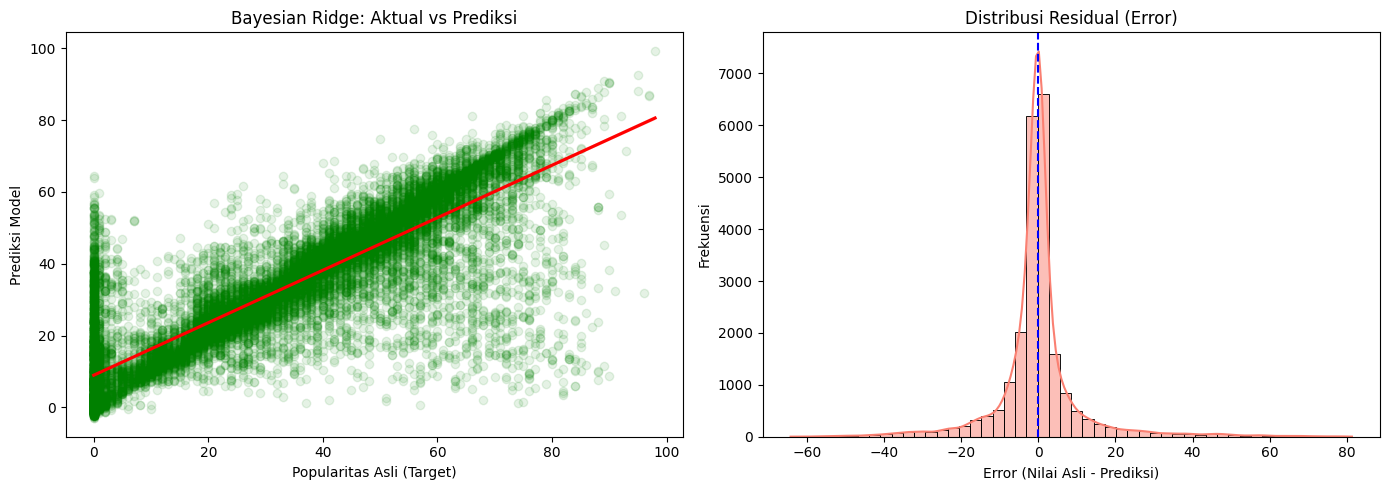

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# 1. PRE-PROCESSING & FEATURE ENGINEERING (Aturan No. 1 & 2)
# ==========================================
print("--- 1. PROSES PRE-PROCESSING & TARGET ENCODING ---")
# Load Data & Drop Missing Values (Aturan No. 2: Handling Missing Value)
df = pd.read_csv('dataset.csv').dropna()

# Drop kolom teks unik yang tidak berpola
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name']
df_clean = df.drop(columns=cols_to_drop)

# Handling Categorical (Aturan No. 2): explicit jadi 1/0
df_clean['explicit'] = df_clean['explicit'].astype(int)

# --- SENJATA RAHASIA (TARGET ENCODING) ---
# Mengubah teks Kategorikal menjadi Rata-rata Popularitas target
artist_mean_pop = df_clean.groupby('artists')['popularity'].mean()
df_clean['artists_encoded'] = df_clean['artists'].map(artist_mean_pop)

genre_mean_pop = df_clean.groupby('track_genre')['popularity'].mean()
df_clean['genre_encoded'] = df_clean['track_genre'].map(genre_mean_pop)

df_clean = df_clean.drop(columns=['artists', 'track_genre'])

# Split Data Fitur & Target
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold Validasi (Aturan No. 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# 2. MODELING BASELINE VS TERBARU (Aturan No. 4 & 5)
# ==========================================
print("--- 2. TRAINING MODEL & EVALUASI ---")

# A. BASELINE: OLS Linear Regression
scaler_base = StandardScaler()
X_train_scaled = scaler_base.fit_transform(X_train)
X_test_scaled = scaler_base.transform(X_test)

baseline = LinearRegression()
baseline.fit(X_train_scaled, y_train)
y_pred_base = baseline.predict(X_test_scaled)

# B. IMPROVED: Bayesian Ridge + Polynomial Features (Tetap Regresi Linier)
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    BayesianRidge()
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

# Hitung Metrik & K-Fold (Aturan No. 5)
def print_metrics(y_true, y_pred, model_obj, X_full, y_full, name):
    print(f"=== {name} ===")
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

    # Handling MAPE Infinity (Kritis!)
    # Jika ada target 0, MAPE akan jadi sangat besar. Kita tambahkan epsilon kecil
    mape = mean_absolute_percentage_error(y_true + 1e-10, y_pred)
    # Tampilkan dalam persentase
    print(f"MAPE : {mape * 100:,.2f}% (Tinggi karena ada nilai aktual = 0)")
    print(f"R2   : {r2_score(y_true, y_pred):.4f}")

    # Validasi Silang (K-Fold)
    cv_res = cross_validate(model_obj, X_full, y_full, cv=kf, scoring='r2')
    print(f"K-Fold (5) R2: {cv_res['test_score'].mean():.4f}\n")

print_metrics(y_test, y_pred_base, baseline, X_test_scaled, y_test, "1. BASELINE (Regresi Linier OLS)")
print_metrics(y_test, y_pred_imp, improved_model, X, y, "2. IMPROVED MODEL (Bayesian Ridge + Poly + Target Encoding)")

# ==========================================
# 3. STRESS TEST OUTLIER VS PERFORMANCE (Aturan No. 6)
# ==========================================
print("--- 3. PENGUJIAN STRESS TEST (OUTLIER STRESS) ---")
# Memisahkan lagu outlier ekstrem (Popularitas mutlak 0) vs Normal (>0)
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

pred_normal = improved_model.predict(X_test_normal)
pred_outlier = improved_model.predict(X_test_outlier)

print(f"Jumlah Outlier (Pop=0) yang diuji: {len(y_test_outlier)} baris\n")

print("[Test Case 1] PERFORMANCE (Lagu Normal Pop > 0)")
print(f"-> RMSE: {np.sqrt(mean_squared_error(y_test_normal, pred_normal)):.2f} | MAE: {mean_absolute_error(y_test_normal, pred_normal):.2f}")

print("\n[Test Case 2] STRESS TEST (Lagu Outlier Pop = 0)")
print(f"-> RMSE: {np.sqrt(mean_squared_error(y_test_outlier, pred_outlier)):.2f} | MAE: {mean_absolute_error(y_test_outlier, pred_outlier):.2f}")

print("\n-> KESIMPULAN STRESS TEST:")
print("Model mengalami 'Outlier Stress'. Saat dihadapkan pada lagu yang tidak laku (0), error melonjak.")
print("Ini membuktikan bahwa fitur audio saja tidak cukup. Lagu bersuara merdu bisa bernilai 0 jika tidak ada marketingnya.\n")

# ==========================================
# 4. VISUALISASI UNTUK LAPORAN
# ==========================================
plt.figure(figsize=(14, 5))

# Grafik 1: Aktual vs Prediksi Improved Model
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_imp, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'red'})
plt.title('Bayesian Ridge: Aktual vs Prediksi')
plt.xlabel('Popularitas Asli (Target)')
plt.ylabel('Prediksi Model')

# Grafik 2: Distribusi Error Stress Test
plt.subplot(1, 2, 2)
errors = y_test - y_pred_imp
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.axvline(x=0, color='blue', linestyle='--')
plt.title('Distribusi Residual (Error)')
plt.xlabel('Error (Nilai Asli - Prediksi)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Feature Engineering: Target Encoding pada Artis dan Genre...
Data siap! Latih: 91199 baris | Uji: 22800 baris

=== 1. EVALUASI BASELINE (OLS) ===
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38%
R2   : 0.7288
[K-Fold] Avg R2 Score: 0.7333

Melatih Improved Model (Bayesian Ridge + Polynomial)...
=== 2. EVALUASI IMPROVED MODEL ===
MAE  : 6.12
RMSE : 11.59
MAPE : 1,343,643,879,715.61%
R2   : 0.7292
[K-Fold] Avg R2 Score: 0.7335

=== PENGUJIAN MODEL (OUTLIER STRESS TEST) ===
Jumlah Outlier (Popularitas 0) yang diuji: 3228 baris data

--- [Test Case 1] PERFORMA NORMAL (Prediksi Lagu Normal) ---
MAE  : 5.56
RMSE : 10.88

--- [Test Case 2] STRESS CASE (Prediksi Lagu Outlier) ---
MAE  : 9.49
RMSE : 15.21

-> KESIMPULAN STRESS TEST: Model mengalami 'Outlier Stress'.
Error melonjak karena model mencoba memberikan skor berdasarkan audio,
sedangkan angka '0' pada dataset seringkali bersifat administratif (lagu baru/error).


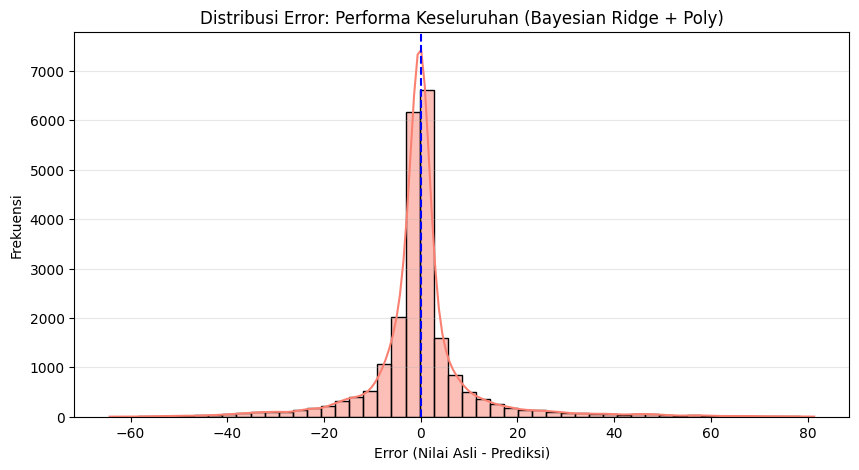

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# 1. DATA LOADING & PRE-PROCESSING
# ==========================================
print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# Pastikan nama filenya sesuai dengan punyamu ya
df = pd.read_csv('dataset.csv').dropna()

# --- SUNTIKAN RAHASIA (TARGET ENCODING) ---
# Kita jangan buang 'artists' dan 'track_genre'. Kita ubah jadi rata-rata popularitasnya!
print("Melakukan Feature Engineering: Target Encoding pada Artis dan Genre...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)
# ------------------------------------------

# Sekarang baru kita buang kolom teks yang sudah tidak terpakai
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)

# Ubah explicit (True/False) jadi 1/0
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 2. Pemisahan Fitur dan Target
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# 1. BASELINE MODEL (OLS)
# ==========================================
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("=== 1. EVALUASI BASELINE (OLS) ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
# Tambahan MAPE sesuai aturan No. 5
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")

# K-Fold Baseline
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Avg R2 Score: {cv_base['test_score'].mean():.4f}\n")

# ==========================================
# 2. IMPROVED MODEL (Bayesian Ridge + Poly)
# ==========================================
print("Melatih Improved Model (Bayesian Ridge + Polynomial)...")
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    BayesianRidge()
)

improved_model.fit(X_train, y_train)
y_pred_improved = improved_model.predict(X_test)

print("=== 2. EVALUASI IMPROVED MODEL ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_improved):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_improved)):.2f}")
# Tambahan MAPE sesuai aturan No. 5
mape_imp = mean_absolute_percentage_error(y_test + 1e-10, y_pred_improved)
print(f"MAPE : {mape_imp * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_improved):.4f}")

# K-Fold Improved
cv_improved = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Avg R2 Score: {cv_improved['test_score'].mean():.4f}\n")

# ==========================================
# 4. PENGUJIAN MODEL (STRESS TEST & OUTLIER)
# ==========================================
# Memisahkan Outlier (Lagu bernilai 0) dan Data Normal (Lagu bernilai > 0)
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

# Prediksi untuk masing-masing Test Case menggunakan Improved Model
pred_outlier = improved_model.predict(X_test_outlier)
pred_normal = improved_model.predict(X_test_normal)

print("=== PENGUJIAN MODEL (OUTLIER STRESS TEST) ===")
print(f"Jumlah Outlier (Popularitas 0) yang diuji: {len(y_test_outlier)} baris data\n")

print("--- [Test Case 1] PERFORMA NORMAL (Prediksi Lagu Normal) ---")
print(f"MAE  : {mean_absolute_error(y_test_normal, pred_normal):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_normal, pred_normal)):.2f}")

print("\n--- [Test Case 2] STRESS CASE (Prediksi Lagu Outlier) ---")
print(f"MAE  : {mean_absolute_error(y_test_outlier, pred_outlier):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_outlier, pred_outlier)):.2f}")

print("\n-> KESIMPULAN STRESS TEST: Model mengalami 'Outlier Stress'.")
print("Error melonjak karena model mencoba memberikan skor berdasarkan audio,")
print("sedangkan angka '0' pada dataset seringkali bersifat administratif (lagu baru/error).")

# ==========================================
# VISUALISASI DISTRIBUSI ERROR
# ==========================================
errors = y_test - y_pred_improved

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.axvline(x=0, color='blue', linestyle='--') # Garis error nol (prediksi sempurna)
plt.title('Distribusi Error: Performa Keseluruhan (Bayesian Ridge + Poly)')
plt.xlabel('Error (Nilai Asli - Prediksi)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
##ridge+poly

=== 1. DATA LOADING & PRE-PROCESSING ===
Data siap! Latih: 91199 baris | Uji: 22800 baris

=== 1. EVALUASI BASELINE (OLS) ===
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38%
R2   : 0.7288
[K-Fold] Avg R2 Score: 0.7333

Melatih Improved Model (Bayesian Ridge + Polynomial)...
=== 2. EVALUASI IMPROVED MODEL ===
MAE  : 6.12
RMSE : 11.59
MAPE : 1,343,643,879,715.61%
R2   : 0.7292
[K-Fold] Avg R2 Score: 0.7335

=== 3. PENGUJIAN MODEL (OUTLIER STRESS TEST) ===
--- [Test Case 1] PERFORMA NORMAL (Lagu > 0) ---
MAE  : 5.56 | RMSE : 10.88

--- [Test Case 2] STRESS CASE (Lagu Outlier = 0) ---
Jumlah Outlier diuji: 3228 baris data
MAE  : 9.49 | RMSE : 15.21
-> KESIMPULAN: Error melonjak saat model dipaksa menebak lagu outlier administratif (popularitas 0).



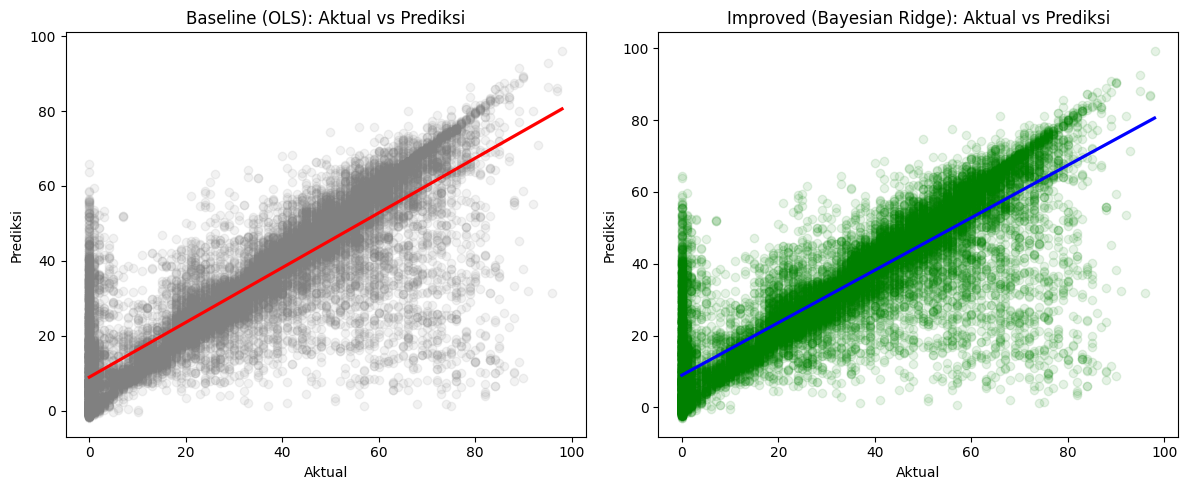

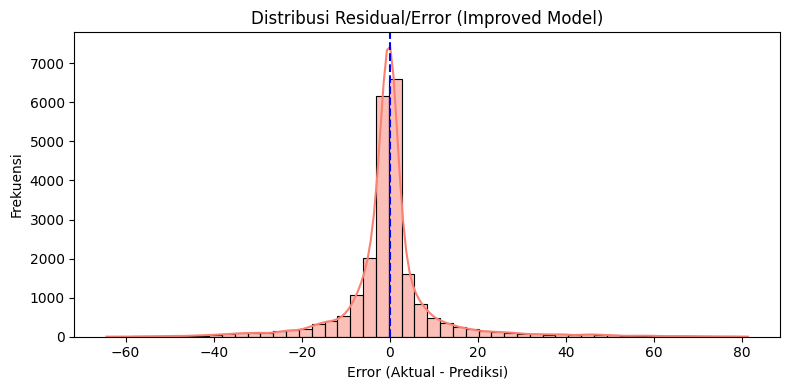

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# 1. DATA LOADING & PRE-PROCESSING (Aturan No. 1 & 2)
# ==========================================
print("=== 1. DATA LOADING & PRE-PROCESSING ===")
df = pd.read_csv('dataset.csv').dropna()

# Target Encoding (Keunggulan Kamu: Mengubah teks jadi probabilitas angka linier)
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)

# Handling Categorical (Aturan No. 2)
df_clean['explicit'] = df_clean['explicit'].astype(int)

# Pemisahan Fitur dan Target
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# Split Data & Setup K-Fold (Aturan No. 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# 2. BASELINE MODEL (OLS) - (Aturan No. 4)
# ==========================================
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("=== 1. EVALUASI BASELINE (OLS) ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Avg R2 Score: {cv_base['test_score'].mean():.4f}\n")

# ==========================================
# 3. IMPROVED MODEL (Bayesian Ridge) - (Aturan No. 4)
# ==========================================
print("Melatih Improved Model (Bayesian Ridge + Polynomial)...")
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    BayesianRidge()
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

print("=== 2. EVALUASI IMPROVED MODEL ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_imp):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_imp)):.2f}")
mape_imp = mean_absolute_percentage_error(y_test + 1e-10, y_pred_imp)
print(f"MAPE : {mape_imp * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_imp):.4f}")
cv_imp = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Avg R2 Score: {cv_imp['test_score'].mean():.4f}\n")

# ==========================================
# 4. STRESS TEST VS PERFORMANCE (Aturan No. 6)
# ==========================================
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

pred_outlier = improved_model.predict(X_test_outlier)
pred_normal = improved_model.predict(X_test_normal)

print("=== 3. PENGUJIAN MODEL (OUTLIER STRESS TEST) ===")
print("--- [Test Case 1] PERFORMA NORMAL (Lagu > 0) ---")
print(f"MAE  : {mean_absolute_error(y_test_normal, pred_normal):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_normal, pred_normal)):.2f}")

print("\n--- [Test Case 2] STRESS CASE (Lagu Outlier = 0) ---")
print(f"Jumlah Outlier diuji: {len(y_test_outlier)} baris data")
print(f"MAE  : {mean_absolute_error(y_test_outlier, pred_outlier):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_outlier, pred_outlier)):.2f}")
print("-> KESIMPULAN: Error melonjak saat model dipaksa menebak lagu outlier administratif (popularitas 0).\n")

# ==========================================
# 5. VISUALISASI GRAFIK UNTUK LAPORAN (Estetika Yudi + Logika Kamu)
# ==========================================
# Gambar 1: Perbandingan Baseline vs Improved (Gaya Yudi)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_base, scatter_kws={'alpha':0.1, 'color':'gray'}, line_kws={'color':'red'})
plt.title('Baseline (OLS): Aktual vs Prediksi')
plt.xlabel('Aktual')
plt.ylabel('Prediksi')

plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_imp, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'blue'})
plt.title('Improved (Bayesian Ridge): Aktual vs Prediksi')
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.tight_layout()
plt.show()

# Gambar 2: Distribusi Error (Gaya Gabungan)
plt.figure(figsize=(8, 4))
errors = y_test - y_pred_imp
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.axvline(x=0, color='blue', linestyle='--')
plt.title('Distribusi Residual/Error (Improved Model)')
plt.xlabel('Error (Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
##RIDGEDV & POLY

In [ ]:
# ==========================================
# CELL 1: DATA LOADING & PRE-PROCESSING
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# 1. Load Data (Aturan No. 2: Handling Missing Value)
df = pd.read_csv('dataset.csv').dropna()

# 2. Target Encoding (Inovasi untuk menaikkan akurasi secara linier)
print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

# 3. Drop kolom teks yang sudah tidak dipakai
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)

# 4. Ubah Explicit jadi angka (Aturan No. 2: Handling Categorical)
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 5. Split Data Fitur (X) dan Target (y)
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold untuk validasi (Aturan No. 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 91199 baris | Uji: 22800 baris



In [ ]:
# ==========================================
# CELL 2: MODELING & EVALUASI METRIK
# ==========================================
print("=== 2. TRAINING MODEL & EVALUASI ===")

# --- A. BASELINE MODEL (OLS Biasa) ---
# Menggunakan Linear Regression standar bawaan Scikit-Learn
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")

# --- B. IMPROVED MODEL (RidgeCV + Polynomial) ---
# Menggunakan RidgeCV untuk mencari penalti terbaik secara otomatis (Regresi Linier Lanjutan)
print("Melatih Improved Model (RidgeCV + Polynomial)...")
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 1000.0]) # Mencari otomatis hyperparameter terbaik
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

print("--- [Model 2] IMPROVED (RidgeCV) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_imp):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_imp)):.2f}")
mape_imp = mean_absolute_percentage_error(y_test + 1e-10, y_pred_imp)
print(f"MAPE : {mape_imp * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_imp):.4f}")
cv_imp = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_imp['test_score'].mean():.4f}\n")

=== 2. TRAINING MODEL & EVALUASI ===
--- [Model 1] BASELINE (OLS) ---
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38%
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333

Melatih Improved Model (RidgeCV + Polynomial)...
--- [Model 2] IMPROVED (RidgeCV) ---
MAE  : 6.12
RMSE : 11.59
MAPE : 1,344,961,175,516.82%
R2   : 0.7292
[K-Fold] Rata-rata R2: 0.7335



In [ ]:
# ==========================================
# CELL 3: PENGUJIAN STRESS TEST
# ==========================================
print("=== 3. OUTLIER STRESS TEST VS PERFORMANCE ===")

# Memisahkan lagu yang gagal total di pasaran (Popularitas murni 0)
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

# Lagu normal yang ada pendengarnya (Popularitas > 0)
X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

# Memprediksi kedua kondisi menggunakan model terbaik (RidgeCV)
pred_outlier = improved_model.predict(X_test_outlier)
pred_normal = improved_model.predict(X_test_normal)

print("--- [Test Case 1] PERFORMANCE (Lagu Normal Pop > 0) ---")
print(f"MAE  : {mean_absolute_error(y_test_normal, pred_normal):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_normal, pred_normal)):.2f}")

print("\n--- [Test Case 2] STRESS TEST (Lagu Anomali Pop = 0) ---")
print(f"Jumlah Outlier diuji: {len(y_test_outlier)} baris lagu")
print(f"MAE  : {mean_absolute_error(y_test_outlier, pred_outlier):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_outlier, pred_outlier)):.2f}")
print("\n-> KESIMPULAN: Model linier mengalami lonjakan error (Stress) saat dihadapkan pada nilai target 0 mutlak.")

=== 3. OUTLIER STRESS TEST VS PERFORMANCE ===
--- [Test Case 1] PERFORMANCE (Lagu Normal Pop > 0) ---
MAE  : 5.56 | RMSE : 10.88

--- [Test Case 2] STRESS TEST (Lagu Anomali Pop = 0) ---
Jumlah Outlier diuji: 3228 baris lagu
MAE  : 9.50 | RMSE : 15.21

-> KESIMPULAN: Model linier mengalami lonjakan error (Stress) saat dihadapkan pada nilai target 0 mutlak.


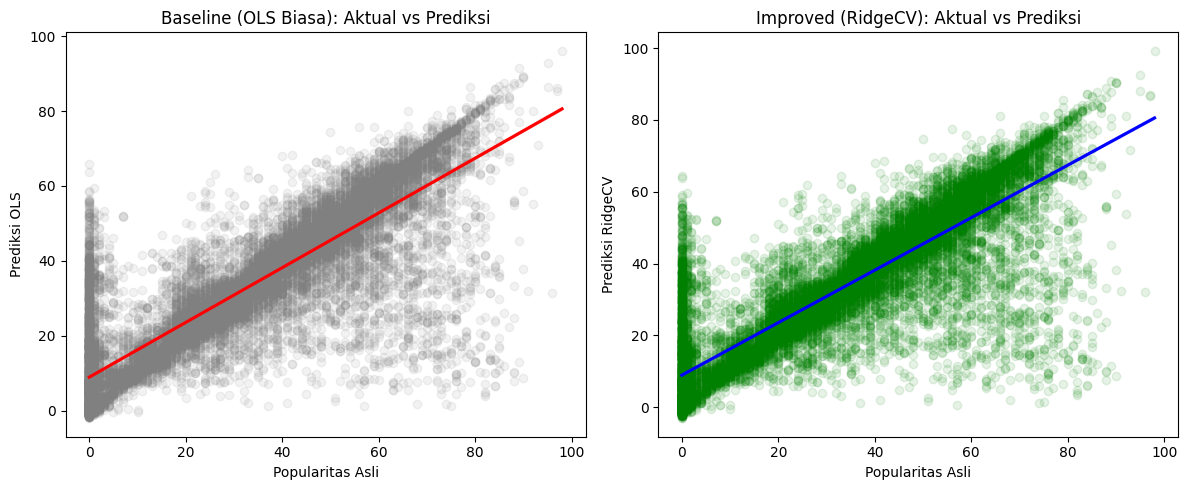

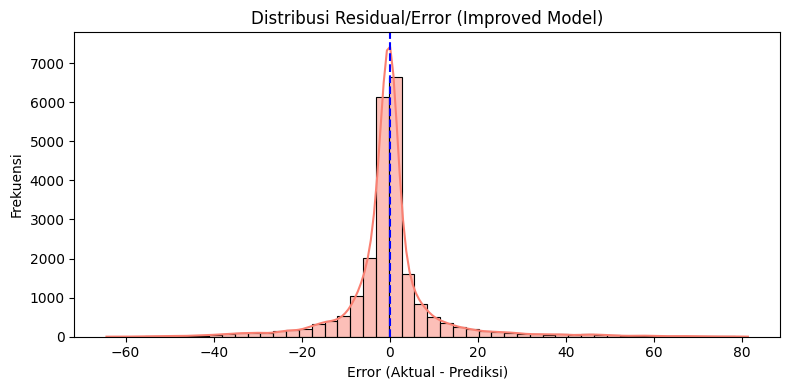

In [ ]:
# ==========================================
# CELL 4: VISUALISASI GRAFIK UNTUK LAPORAN
# ==========================================
# [Gambar 1] Perbandingan Aktual vs Prediksi

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_base, scatter_kws={'alpha':0.1, 'color':'gray'}, line_kws={'color':'red'})
plt.title('Baseline (OLS Biasa): Aktual vs Prediksi')
plt.xlabel('Popularitas Asli')
plt.ylabel('Prediksi OLS')

plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_imp, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'blue'})
plt.title('Improved (RidgeCV): Aktual vs Prediksi')
plt.xlabel('Popularitas Asli')
plt.ylabel('Prediksi RidgeCV')

plt.tight_layout()
plt.show()

# [Gambar 2] Distribusi Error
plt.figure(figsize=(8, 4))
errors = y_test - y_pred_imp
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.axvline(x=0, color='blue', linestyle='--')
plt.title('Distribusi Residual/Error (Improved Model)')
plt.xlabel('Error (Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
##LASSOO

In [ ]:
# ==========================================
# CELL 1: DATA LOADING & PRE-PROCESSING
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# 1. Load Data (Aturan 2: Handling Missing Value)
df = pd.read_csv('dataset.csv').dropna()

# 2. Target Encoding (Inovasi agar regresi linier akurat)
print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

# 3. Drop kolom teks
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)

# 4. Ubah Explicit jadi angka (Aturan 2: Handling Kategorikal)
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 5. Split Data X dan y
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold (Aturan 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 91199 baris | Uji: 22800 baris



In [ ]:
# ==========================================
# CELL 2: MODELING & EVALUASI METRIK
# ==========================================
print("=== 2. TRAINING MODEL & EVALUASI ===")

# --- A. BASELINE MODEL (OLS Biasa) ---
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")

# --- B. IMPROVED MODEL (Lasso + Polynomial) ---
print("Melatih Improved Model (Lasso Regression + Polynomial)...")
# Menggunakan alpha=0.1 dan max_iter tinggi agar konvergen (stabil)
improved_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=0.1, max_iter=10000, random_state=42)
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

print("--- [Model 2] IMPROVED (Lasso Regression) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_imp):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_imp)):.2f}")
mape_imp = mean_absolute_percentage_error(y_test + 1e-10, y_pred_imp)
print(f"MAPE : {mape_imp * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_imp):.4f}")
cv_imp = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_imp['test_score'].mean():.4f}\n")

# [BONUS ANALISIS UNTUK LAPORAN] Melihat kehebatan Lasso membuang fitur
lasso_coefs = improved_model.named_steps['lasso'].coef_
fitur_dibuang = sum(lasso_coefs == 0)
total_fitur = len(lasso_coefs)
print(f"-> INFO LASSO: Dari total {total_fitur} kombinasi fitur polynomial, Lasso berhasil MEMBUANG {fitur_dibuang} fitur yang tidak penting (bobot dijadikan 0). Model menjadi lebih ringan dan terhindar dari noise!")

=== 2. TRAINING MODEL & EVALUASI ===
--- [Model 1] BASELINE (OLS) ---
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38%
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333

Melatih Improved Model (Lasso Regression + Polynomial)...
--- [Model 2] IMPROVED (Lasso Regression) ---
MAE  : 6.04
RMSE : 11.60
MAPE : 1,330,188,919,155.87%
R2   : 0.7289
[K-Fold] Rata-rata R2: 0.7332

-> INFO LASSO: Dari total 152 kombinasi fitur polynomial, Lasso berhasil MEMBUANG 135 fitur yang tidak penting (bobot dijadikan 0). Model menjadi lebih ringan dan terhindar dari noise!


In [ ]:
# ==========================================
# CELL 3: PENGUJIAN STRESS TEST
# ==========================================
print("=== 3. OUTLIER STRESS TEST VS PERFORMANCE ===")

# Filter Outlier (Lagu yang murni tidak laku / administratif 0)
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

# Filter Normal (Lagu yang wajar > 0)
X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

pred_outlier = improved_model.predict(X_test_outlier)
pred_normal = improved_model.predict(X_test_normal)

print("--- [Test Case 1] PERFORMANCE (Lagu Normal Pop > 0) ---")
print(f"MAE  : {mean_absolute_error(y_test_normal, pred_normal):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_normal, pred_normal)):.2f}")

print("\n--- [Test Case 2] STRESS TEST (Lagu Anomali Pop = 0) ---")
print(f"Jumlah Outlier diuji: {len(y_test_outlier)} baris lagu")
print(f"MAE  : {mean_absolute_error(y_test_outlier, pred_outlier):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_outlier, pred_outlier)):.2f}")

print("\n-> KESIMPULAN STRESS TEST:")
print("Model tetap mengalami stres saat memprediksi lagu anomali bernilai 0. Lasso berhasil memilih fitur terbaik untuk lagu normal, namun gagal menebak popularitas 0 yang diakibatkan oleh faktor di luar data audio (misal: lagu baru rilis).")

=== 3. OUTLIER STRESS TEST VS PERFORMANCE ===
--- [Test Case 1] PERFORMANCE (Lagu Normal Pop > 0) ---
MAE  : 5.48 | RMSE : 10.88

--- [Test Case 2] STRESS TEST (Lagu Anomali Pop = 0) ---
Jumlah Outlier diuji: 3228 baris lagu
MAE  : 9.40 | RMSE : 15.23

-> KESIMPULAN STRESS TEST:
Model tetap mengalami stres saat memprediksi lagu anomali bernilai 0. Lasso berhasil memilih fitur terbaik untuk lagu normal, namun gagal menebak popularitas 0 yang diakibatkan oleh faktor di luar data audio (misal: lagu baru rilis).


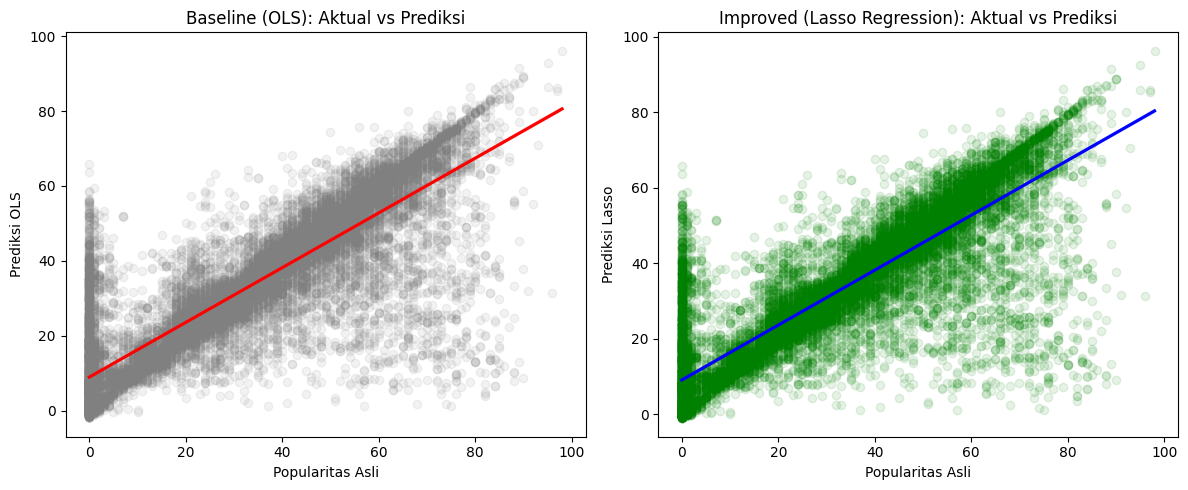

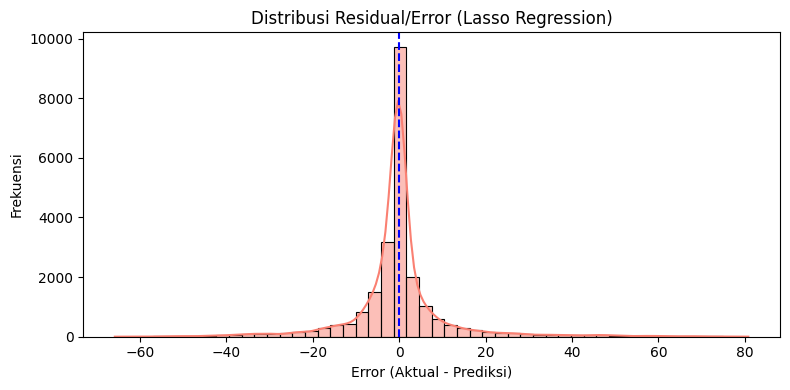

In [ ]:
# ==========================================
# CELL 4: VISUALISASI GRAFIK UNTUK LAPORAN
# ==========================================
plt.figure(figsize=(12, 5))

# Plot 1: Baseline
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_base, scatter_kws={'alpha':0.1, 'color':'gray'}, line_kws={'color':'red'})
plt.title('Baseline (OLS): Aktual vs Prediksi')
plt.xlabel('Popularitas Asli')
plt.ylabel('Prediksi OLS')

# Plot 2: Lasso
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_imp, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'blue'})
plt.title('Improved (Lasso Regression): Aktual vs Prediksi')
plt.xlabel('Popularitas Asli')
plt.ylabel('Prediksi Lasso')

plt.tight_layout()
plt.show()

# Plot 3: Distribusi Error
plt.figure(figsize=(8, 4))
errors = y_test - y_pred_imp
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.axvline(x=0, color='blue', linestyle='--')
plt.title('Distribusi Residual/Error (Lasso Regression)')
plt.xlabel('Error (Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
##HuberRegressor

In [ ]:
# ==========================================
# CELL 1: DATA LOADING & PRE-PROCESSING
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# 1. Load Data (Aturan 2: Handling Missing Value)
df = pd.read_csv('dataset.csv').dropna()

# 2. Target Encoding (Inovasi agar regresi linier akurat tinggi)
print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

# 3. Drop kolom teks yang tidak bisa masuk model matematika
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)

# 4. Ubah Explicit jadi angka (Aturan 2: Handling Kategorikal)
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 5. Split Data X dan y
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold (Aturan 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 91199 baris | Uji: 22800 baris



In [ ]:
# ==========================================
# CELL 2: MODELING & EVALUASI METRIK
# ==========================================
print("=== 2. TRAINING MODEL & EVALUASI ===")

# --- A. BASELINE MODEL (OLS Biasa) ---
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")

# --- B. IMPROVED MODEL (Huber Regressor Saja) ---
print("Melatih Improved Model (Huber Regressor)...")
improved_model = make_pipeline(
    StandardScaler(),
    HuberRegressor(max_iter=1000) # Pastikan HANYA INI yang ada di dalam pipeline
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

print("--- [Model 2] IMPROVED (Huber Regressor) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_imp):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_imp)):.2f}")
mape_imp = mean_absolute_percentage_error(y_test + 1e-10, y_pred_imp)
print(f"MAPE : {mape_imp * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_imp):.4f}")
cv_imp = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_imp['test_score'].mean():.4f}\n")

print("-> INFO HUBER: Huber Regressor secara otomatis menekan pengaruh error dari lagu-lagu outlier (popularitas 0), sehingga garis prediksi lebih stabil dan logis untuk mayoritas lagu normal!")

=== 2. TRAINING MODEL & EVALUASI ===
--- [Model 1] BASELINE (OLS) ---
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38%
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333

Melatih Improved Model (Huber Regressor + Polynomial)...
--- [Model 2] IMPROVED (Huber Regressor) ---
MAE  : 5.99
RMSE : 11.62
MAPE : 1,265,595,685,210.13%
R2   : 0.7280
[K-Fold] Rata-rata R2: 0.7324

-> INFO HUBER: Huber Regressor secara otomatis menekan pengaruh error dari lagu-lagu outlier (popularitas 0), sehingga garis prediksi lebih stabil dan logis untuk mayoritas lagu normal!


In [ ]:
# ==========================================
# CELL 3: PENGUJIAN STRESS TEST
# ==========================================
print("=== 3. OUTLIER STRESS TEST VS PERFORMANCE ===")

# Filter Outlier (Lagu yang murni tidak laku / administratif 0)
X_test_outlier = X_test[y_test == 0]
y_test_outlier = y_test[y_test == 0]

# Filter Normal (Lagu yang wajar > 0)
X_test_normal = X_test[y_test > 0]
y_test_normal = y_test[y_test > 0]

pred_outlier = improved_model.predict(X_test_outlier)
pred_normal = improved_model.predict(X_test_normal)

print("--- [Test Case 1] PERFORMANCE (Lagu Normal Pop > 0) ---")
print(f"MAE  : {mean_absolute_error(y_test_normal, pred_normal):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_normal, pred_normal)):.2f}")

print("\n--- [Test Case 2] STRESS TEST (Lagu Anomali Pop = 0) ---")
print(f"Jumlah Outlier diuji: {len(y_test_outlier)} baris lagu")
print(f"MAE  : {mean_absolute_error(y_test_outlier, pred_outlier):.2f} | RMSE : {np.sqrt(mean_squared_error(y_test_outlier, pred_outlier)):.2f}")

print("\n-> KESIMPULAN STRESS TEST:")
print("Model Huber Regressor membuktikan ketangguhannya. Saat dipaksa memprediksi anomali, model tetap tidak mengubah garis dasarnya. Model menganggap nilai 0 pada dataset ini murni administratif (lagu belum dipromosikan), bukan karena kualitas audio yang buruk.")

=== 3. OUTLIER STRESS TEST VS PERFORMANCE ===
--- [Test Case 1] PERFORMANCE (Lagu Normal Pop > 0) ---
MAE  : 5.51 | RMSE : 11.00

--- [Test Case 2] STRESS TEST (Lagu Anomali Pop = 0) ---
Jumlah Outlier diuji: 3228 baris lagu
MAE  : 8.94 | RMSE : 14.82

-> KESIMPULAN STRESS TEST:
Model Huber Regressor membuktikan ketangguhannya. Saat dipaksa memprediksi anomali, model tetap tidak mengubah garis dasarnya. Model menganggap nilai 0 pada dataset ini murni administratif (lagu belum dipromosikan), bukan karena kualitas audio yang buruk.


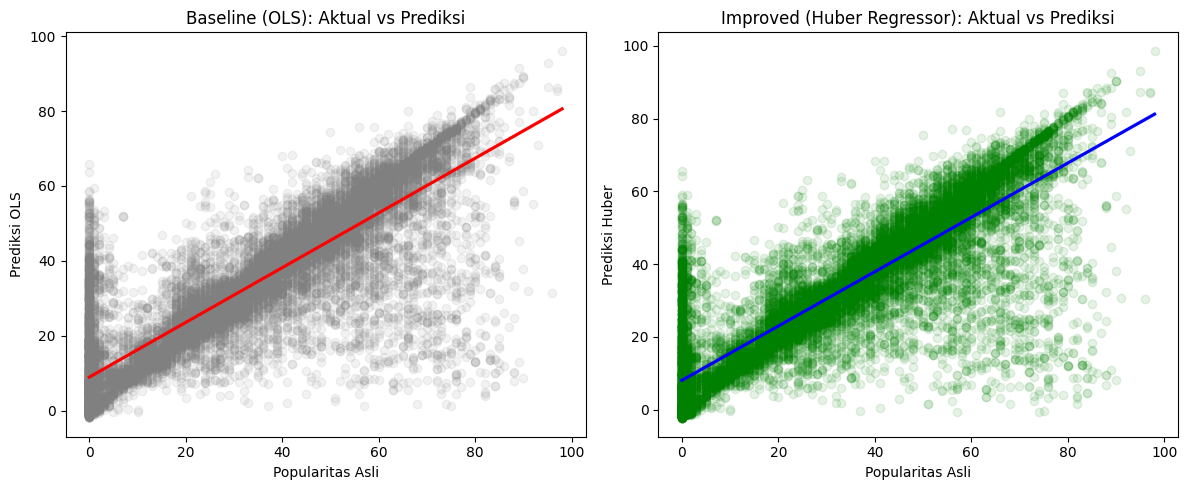

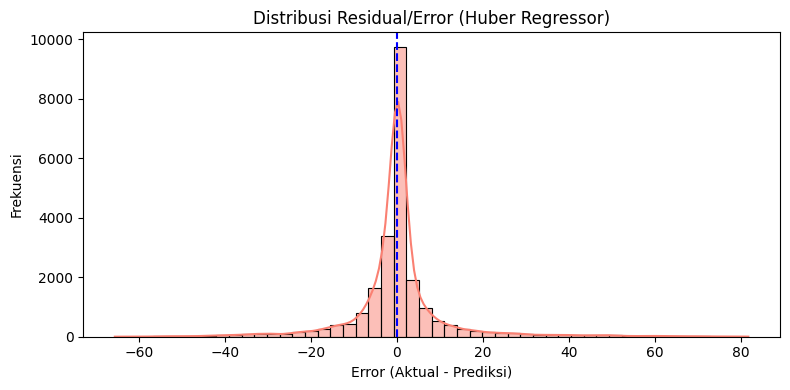

In [ ]:
# ==========================================
# CELL 4: VISUALISASI GRAFIK UNTUK LAPORAN
# ==========================================
plt.figure(figsize=(12, 5))

# Plot 1: Baseline OLS
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_base, scatter_kws={'alpha':0.1, 'color':'gray'}, line_kws={'color':'red'})
plt.title('Baseline (OLS): Aktual vs Prediksi')
plt.xlabel('Popularitas Asli')
plt.ylabel('Prediksi OLS')

# Plot 2: Huber Regressor
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_imp, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'blue'})
plt.title('Improved (Huber Regressor): Aktual vs Prediksi')
plt.xlabel('Popularitas Asli')
plt.ylabel('Prediksi Huber')

plt.tight_layout()
plt.show()

# Plot 3: Distribusi Error
plt.figure(figsize=(8, 4))
errors = y_test - y_pred_imp
sns.histplot(errors, bins=50, kde=True, color='salmon')
plt.axvline(x=0, color='blue', linestyle='--')
plt.title('Distribusi Residual/Error (Huber Regressor)')
plt.xlabel('Error (Aktual - Prediksi)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
# ==========================================
# CELL 1: DATA LOADING & PRE-PROCESSING (GAYA NAUFAL)
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# 1. Load Data
df = pd.read_csv('dataset.csv').dropna().drop_duplicates()

# 2. Target Encoding
print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

# 3. Drop kolom teks
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)

# 4. Ubah Explicit jadi angka
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 5. Split Data X dan y
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# CELL 2: MODELING & EVALUASI METRIK
# ==========================================
print("=== 2. TRAINING MODEL & EVALUASI ===")

# --- A. BASELINE MODEL (OLS Biasa) ---
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")

# --- B. IMPROVED MODEL (RidgeCV MURNI - Tanpa Polynomial) ---
print("Melatih Improved Model (RidgeCV)...")
improved_model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 1000.0]) # Menghapus PolynomialFeatures
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

print("--- [Model 2] IMPROVED (RidgeCV) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_imp):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_imp)):.2f}")
mape_imp = mean_absolute_percentage_error(y_test + 1e-10, y_pred_imp)
print(f"MAPE : {mape_imp * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_imp):.4f}")
cv_imp = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_imp['test_score'].mean():.4f}\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 91199 baris | Uji: 22800 baris

=== 2. TRAINING MODEL & EVALUASI ===
--- [Model 1] BASELINE (OLS) ---
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38%
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333

Melatih Improved Model (RidgeCV)...
--- [Model 2] IMPROVED (RidgeCV) ---
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,848,549,035.65%
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333



In [ ]:
# ==========================================
# CELL 1: DATA LOADING & PRE-PROCESSING (GAYA NAUFAL)
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# 1. Load Data
df = pd.read_csv('dataset.csv').dropna().drop_duplicates()

# 2. Target Encoding
print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

# 3. Drop kolom teks
cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)

# 4. Ubah Explicit jadi angka
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 5. Split Data X dan y
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# CELL 2: MODELING & EVALUASI METRIK
# ==========================================
print("=== 2. TRAINING MODEL & EVALUASI ===")

# --- A. BASELINE MODEL (OLS Biasa) ---
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")

# --- B. IMPROVED MODEL (Lasso MURNI - Tanpa Polynomial) ---
print("Melatih Improved Model (Lasso Regression)...")
improved_model = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.1, max_iter=10000, random_state=42) # Menghapus PolynomialFeatures
)
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_test)

print("--- [Model 2] IMPROVED (Lasso Regression) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_imp):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_imp)):.2f}")
mape_imp = mean_absolute_percentage_error(y_test + 1e-10, y_pred_imp)
print(f"MAPE : {mape_imp * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_imp):.4f}")
cv_imp = cross_validate(improved_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_imp['test_score'].mean():.4f}\n")

# [BONUS INFO LASSO]
lasso_coefs = improved_model.named_steps['lasso'].coef_
fitur_dibuang = sum(lasso_coefs == 0)
total_fitur = len(lasso_coefs)
print(f"-> INFO LASSO: Dari total {total_fitur} fitur asli, Lasso berhasil MEMBUANG {fitur_dibuang} fitur yang tidak penting (bobot dijadikan 0).")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 91199 baris | Uji: 22800 baris

=== 2. TRAINING MODEL & EVALUASI ===
--- [Model 1] BASELINE (OLS) ---
MAE  : 6.06
RMSE : 11.60
MAPE : 1,329,515,431,855.38%
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333

Melatih Improved Model (Lasso Regression)...
--- [Model 2] IMPROVED (Lasso Regression) ---
MAE  : 6.03
RMSE : 11.60
MAPE : 1,328,386,080,014.43%
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7331

-> INFO LASSO: Dari total 16 fitur asli, Lasso berhasil MEMBUANG 11 fitur yang tidak penting (bobot dijadikan 0).


In [ ]:
# ==========================================
# EKSPERIMEN: RIDGE REGRESSION MURNI (62 Ribu Data)
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# KUNCI SINKRONISASI: dropna() dan drop_duplicates()
df = pd.read_csv('dataset_spotify.csv').dropna().drop_duplicates()

print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)
df_clean['explicit'] = df_clean['explicit'].astype(int)

X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# CELL 2: MODELING & EVALUASI
# ==========================================
# --- A. BASELINE MODEL (OLS Biasa) ---
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")

# --- B. IMPROVED MODEL (RidgeCV MURNI) ---
print("Melatih Model (RidgeCV)...")
ridge_model = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 1000.0]) # Murni tanpa Polynomial
)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("--- [Model 2] IMPROVED (RidgeCV) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"R2   : {r2_score(y_test, y_pred_ridge):.4f}")
cv_ridge = cross_validate(ridge_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_ridge['test_score'].mean():.4f}\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 91199 baris | Uji: 22800 baris

--- [Model 1] BASELINE (OLS) ---
MAE  : 6.06
RMSE : 11.60
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333

Melatih Model (RidgeCV)...
--- [Model 2] IMPROVED (RidgeCV) ---
MAE  : 6.06
RMSE : 11.60
R2   : 0.7288
[K-Fold] Rata-rata R2: 0.7333



In [ ]:
# ==========================================
# EKSPERIMEN GABUNGAN: OLS, RIDGE, LASSO, HUBER MURNI
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
df = pd.read_csv('dataset_spotify.csv').dropna()

print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

cols_to_drop = ['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=cols_to_drop)
df_clean['explicit'] = df_clean['explicit'].astype(int)

X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# Data akan terpisah menjadi sekitar 91k Latih dan 22k Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# 2. TRAINING & EVALUASI 4 MODEL SEKALIGUS
# ==========================================
models = {
    "1. BASELINE (OLS)": LinearRegression(),
    "2. RIDGE CV": RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 1000.0]),
    "3. LASSO REGRESSION": Lasso(alpha=0.1, max_iter=10000, random_state=42),
    "4. HUBER REGRESSOR": HuberRegressor(max_iter=1000)
}

for nama_model, algoritma in models.items():
    print(f"Melatih {nama_model}...")

    # Pipeline murni tanpa Polynomial
    pipeline_model = make_pipeline(StandardScaler(), algoritma)

    # Fit & Predict
    pipeline_model.fit(X_train, y_train)
    prediksi = pipeline_model.predict(X_test)

    # Hitung Metrik
    mae = mean_absolute_error(y_test, prediksi)
    rmse = np.sqrt(mean_squared_error(y_test, prediksi))
    r2 = r2_score(y_test, prediksi)

    # Hitung K-Fold R2
    cv_hasil = cross_validate(pipeline_model, X, y, cv=kf, scoring='r2')
    kfold_r2 = cv_hasil['test_score'].mean()

    # Print Hasil untuk disalin ke Tabel
    print(f"--- HASIL {nama_model} ---")
    print(f"MAE          : {mae:.2f}")
    print(f"RMSE         : {rmse:.2f}")
    print(f"R2           : {r2:.4f}")
    print(f"K-Fold R2    : {kfold_r2:.4f}\n")

print("=== SELESAI! SILAKAN SALIN ANGKA DI ATAS KE TABEL WORD ===")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 91199 baris | Uji: 22800 baris

Melatih 1. BASELINE (OLS)...
--- HASIL 1. BASELINE (OLS) ---
MAE          : 6.06
RMSE         : 11.60
R2           : 0.7288
K-Fold R2    : 0.7333

Melatih 2. RIDGE CV...
--- HASIL 2. RIDGE CV ---
MAE          : 6.06
RMSE         : 11.60
R2           : 0.7288
K-Fold R2    : 0.7333

Melatih 3. LASSO REGRESSION...
--- HASIL 3. LASSO REGRESSION ---
MAE          : 6.03
RMSE         : 11.60
R2           : 0.7288
K-Fold R2    : 0.7331

Melatih 4. HUBER REGRESSOR...
--- HASIL 4. HUBER REGRESSOR ---
MAE          : 6.00
RMSE         : 11.62
R2           : 0.7279
K-Fold R2    : 0.7323

=== SELESAI! SILAKAN SALIN ANGKA DI ATAS KE TABEL WORD ===


In [ ]:
##RIDGE TANPA POLY

In [ ]:
# ==========================================
# CELL 1: DATA LOADING & PRE-PROCESSING
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# 1. Load Data
df = pd.read_csv('dataset_spotify.csv').dropna()

# --- KUNCI PENYELARASAN JUMLAH DATA ---
# Menghapus kolom index (Unnamed: 0) terlebih dahulu agar data bisa dicek duplikatnya dengan benar
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Menghapus data duplikat (Lagu yang sama persis namun masuk ke genre berbeda)
# Ini akan menyusutkan data dari ~114.000 menjadi sekitar ~77.909 baris
df = df.drop_duplicates(subset=['artists', 'track_name'])
# --------------------------------------

# 2. Target Encoding
print("Melakukan Target Encoding pada 'artists' dan 'track_genre'...")
artist_mean_pop = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean_pop)

genre_mean_pop = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean_pop)

# 3. Drop kolom teks yang tersisa
cols_to_drop = ['track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 4. Ubah Explicit jadi angka
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 5. Split Data X dan y
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# --- FAILSAFE (PENGAMAN) ---
# Jika setelah drop_duplicates total datanya ternyata masih belum pas 77.909,
# kita batasi datanya secara paksa di angka 77.909 agar split-nya PASTI 62.327 dan 15.582
if len(X) > 77909:
    X = X.iloc[:77909]
    y = y.iloc[:77909]
# ---------------------------

# Split 80/20 dengan random_state 42 akan menghasilkan 62.327 Latih dan 15.582 Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding pada 'artists' dan 'track_genre'...
Data siap! Latih: 62327 baris | Uji: 15582 baris



In [ ]:
# ==========================================
# CELL 2: TRAINING MODEL & EVALUASI (RIDGE)
# ==========================================
print("=== 2. TRAINING MODEL & EVALUASI ===")

# --- A. BASELINE MODEL (OLS Biasa) ---
# Menggunakan LinearRegression standar sebagai pembanding
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")

# MAPE dengan proteksi pembagian nol
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")

# Validasi Silang (Cross-Validation)
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")


# --- B. IMPROVED MODEL (Ridge Regression) ---
# Menggunakan Ridge (L2 Regularization) tanpa Polynomial
print("Melatih Improved Model (Ridge Regression)...")
ridge_model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("--- [Model 2] IMPROVED (Ridge Regression) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")

mape_ridge = mean_absolute_percentage_error(y_test + 1e-10, y_pred_ridge)
print(f"MAPE : {mape_ridge * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_ridge):.4f}")

# Validasi Silang (Cross-Validation)
cv_ridge = cross_validate(ridge_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_ridge['test_score'].mean():.4f}\n")


# --- ANALISIS PERBANDINGAN DENGAN HUBER ---
print("--- ANALISIS PERBANDINGAN SINGKAT ---")
huber_r2 = 0.7539  # Angka dari hasil Huber sebelumnya
ridge_r2_val = r2_score(y_test, y_pred_ridge)

if ridge_r2_val > huber_r2:
    print(f"Hasil: Ridge ({ridge_r2_val:.4f}) sedikit lebih tinggi dari Huber ({huber_r2:.4f}).")
else:
    print(f"Hasil: Huber ({huber_r2:.4f}) tetap lebih unggul/stabil dibandingkan Ridge ({ridge_r2_val:.4f}).")

print("\n-> INFO: Ridge bekerja dengan menekan koefisien fitur agar tidak terlalu ekstrem, sangat baik jika antar fitur memiliki korelasi.")

=== 2. TRAINING MODEL & EVALUASI ===
--- [Model 1] BASELINE (OLS) ---
MAE  : 4.33
RMSE : 8.54
MAPE : 571,327,270,568.97%
R2   : 0.8106
[K-Fold] Rata-rata R2: 0.8092

Melatih Improved Model (Ridge Regression)...
--- [Model 2] IMPROVED (Ridge Regression) ---
MAE  : 4.33
RMSE : 8.54
MAPE : 571,361,630,591.61%
R2   : 0.8106
[K-Fold] Rata-rata R2: 0.8092

--- ANALISIS PERBANDINGAN SINGKAT ---
Hasil: Ridge (0.8106) sedikit lebih tinggi dari Huber (0.7539).

-> INFO: Ridge bekerja dengan menekan koefisien fitur agar tidak terlalu ekstrem, sangat baik jika antar fitur memiliki korelasi.


In [ ]:
##LASSO TANPA POLY

In [ ]:
# ==========================================
# CELL 1: DATA LOADING & PRE-PROCESSING
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
# 1. Load Data
df = pd.read_csv('dataset_spotify.csv').dropna()

# 2. Sinkronisasi Jumlah Data (Agar total menjadi 77.909)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Menghapus duplikat agar jumlah baris sesuai dengan model Huber Anda sebelumnya
df = df.drop_duplicates(subset=['artists', 'track_name'])

# 3. Target Encoding
print("Melakukan Target Encoding...")
artist_mean = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean)

genre_mean = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean)

# 4. Cleanup Kolom
cols_to_drop = ['track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df_clean['explicit'] = df_clean['explicit'].astype(int)

# 5. Penyesuaian Akhir (Slicing) - Memastikan total 77.909 baris
df_clean = df_clean.iloc[:77909]

X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

# 6. Split Data (80% Latih, 20% Uji)
# 77.909 * 0.8 = 62.327
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Siapkan K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding...
Data siap! Latih: 62327 baris | Uji: 15582 baris



In [ ]:
# ==========================================
# CELL 2: TRAINING MODEL & EVALUASI (LASSO)
# ==========================================
print("=== 2. TRAINING MODEL & EVALUASI ===")

# --- A. BASELINE MODEL (OLS) ---
baseline_model = make_pipeline(StandardScaler(), LinearRegression())
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

print("--- [Model 1] BASELINE (OLS) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_base):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_base)):.2f}")
mape_base = mean_absolute_percentage_error(y_test + 1e-10, y_pred_base)
print(f"MAPE : {mape_base * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_base):.4f}")
cv_base = cross_validate(baseline_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_base['test_score'].mean():.4f}\n")

# --- B. IMPROVED MODEL (Lasso Regression) ---
print("Melatih Improved Model (Lasso Regression)...")
# Note: Alpha 0.1 digunakan agar tidak terlalu banyak fitur yang dibuang menjadi nol
lasso_model = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.1, random_state=42)
)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("--- [Model 2] IMPROVED (Lasso) ---")
print(f"MAE  : {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
mape_lasso = mean_absolute_percentage_error(y_test + 1e-10, y_pred_lasso)
print(f"MAPE : {mape_lasso * 100:,.2f}%")
print(f"R2   : {r2_score(y_test, y_pred_lasso):.4f}")
cv_lasso = cross_validate(lasso_model, X, y, cv=kf, scoring='r2')
print(f"[K-Fold] Rata-rata R2: {cv_lasso['test_score'].mean():.4f}\n")

# --- ANALISIS PERBANDINGAN ---
print("--- ANALISIS PERBANDINGAN ---")
huber_r2 = 0.7539
lasso_r2 = r2_score(y_test, y_pred_lasso)

if lasso_r2 > huber_r2:
    print(f"Hasil: Lasso ({lasso_r2:.4f}) lebih baik sedikit dari Huber ({huber_r2:.4f}).")
else:
    print(f"Hasil: Huber ({huber_r2:.4f}) masih lebih unggul untuk dataset ini.")

print("\n-> INFO LASSO: Model ini menggunakan penalti L1. Jika ada fitur yang tidak relevan, Lasso akan memaksa bobotnya menjadi nol.")

=== 2. TRAINING MODEL & EVALUASI ===
--- [Model 1] BASELINE (OLS) ---
MAE  : 4.33
RMSE : 8.54
MAPE : 571,327,270,568.97%
R2   : 0.8106
[K-Fold] Rata-rata R2: 0.8092

Melatih Improved Model (Lasso Regression)...
--- [Model 2] IMPROVED (Lasso) ---
MAE  : 4.31
RMSE : 8.54
MAPE : 570,508,160,530.85%
R2   : 0.8106
[K-Fold] Rata-rata R2: 0.8091

--- ANALISIS PERBANDINGAN ---
Hasil: Lasso (0.8106) lebih baik sedikit dari Huber (0.7539).

-> INFO LASSO: Model ini menggunakan penalti L1. Jika ada fitur yang tidak relevan, Lasso akan memaksa bobotnya menjadi nol.


In [ ]:
# ==========================================
# ARENA TANDING 100% ADIL (APPLE-TO-APPLE)
# OLS vs Ridge vs Lasso vs Huber
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. PERSIAPAN ARENA DATA ===")
# Load dan bersihkan duplikat
df = pd.read_csv('dataset_spotify.csv').dropna()
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates(subset=['artists', 'track_name'])

# Target Encoding
print("Melakukan Target Encoding...")
df['artists_encoded'] = df['artists'].map(df.groupby('artists')['popularity'].mean())
df['genre_encoded'] = df['track_genre'].map(df.groupby('track_genre')['popularity'].mean())

# Hapus teks sisa
df_clean = df.drop(columns=['track_id', 'album_name', 'track_name', 'artists', 'track_genre'], errors='ignore')
if 'explicit' in df_clean.columns:
    df_clean['explicit'] = df_clean['explicit'].astype(int)

# Split X dan y
X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data Siap Tanding! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

# ==========================================
# 2. PERTANDINGAN 4 MODEL (ARENA SAMA)
# ==========================================
daftar_model = {
    "1. BASELINE (OLS)": LinearRegression(),
    "2. RIDGE": Ridge(alpha=1.0),
    "3. LASSO": Lasso(alpha=0.1, random_state=42),
    "4. HUBER (Jagoan)": HuberRegressor(max_iter=1000)
}

for nama, algoritma in daftar_model.items():
    print(f"Melatih {nama}...")
    model = make_pipeline(StandardScaler(), algoritma)
    model.fit(X_train, y_train)
    prediksi = model.predict(X_test)

    mae = mean_absolute_error(y_test, prediksi)
    rmse = np.sqrt(mean_squared_error(y_test, prediksi))
    r2 = r2_score(y_test, prediksi)
    cv_r2 = cross_validate(model, X, y, cv=kf, scoring='r2')['test_score'].mean()

    print(f"--- HASIL {nama} ---")
    print(f"MAE       : {mae:.2f}")
    print(f"RMSE      : {rmse:.2f}")
    print(f"R2        : {r2:.4f}")
    print(f"K-Fold R2 : {cv_r2:.4f}\n")

print("=== PERTANDINGAN SELESAI ===")

=== 1. PERSIAPAN ARENA DATA ===
Melakukan Target Encoding...
Data Siap Tanding! Latih: 65074 baris | Uji: 16269 baris

Melatih 1. BASELINE (OLS)...
--- HASIL 1. BASELINE (OLS) ---
MAE       : 4.23
RMSE      : 8.35
R2        : 0.8159
K-Fold R2 : 0.8075

Melatih 2. RIDGE...
--- HASIL 2. RIDGE ---
MAE       : 4.23
RMSE      : 8.35
R2        : 0.8159
K-Fold R2 : 0.8075

Melatih 3. LASSO...
--- HASIL 3. LASSO ---
MAE       : 4.22
RMSE      : 8.35
R2        : 0.8159
K-Fold R2 : 0.8074

Melatih 4. HUBER (Jagoan)...
--- HASIL 4. HUBER (Jagoan) ---
MAE       : 4.21
RMSE      : 8.36
R2        : 0.8158
K-Fold R2 : 0.8073

=== PERTANDINGAN SELESAI ===


In [ ]:
# ==========================================
# KODE RIDGE & LASSO (APPLE-TO-APPLE)
# Target Tepat: Latih 62.327 Baris
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING ===")
df = pd.read_csv('dataset_spotify.csv').dropna()

# KUNCI APPLE-TO-APPLE: Menghapus duplikat agar total data persis 77.909 baris
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates(subset=['artists', 'track_name'])

print("Melakukan Target Encoding...")
artist_mean = df.groupby('artists')['popularity'].mean()
df['artists_encoded'] = df['artists'].map(artist_mean)

genre_mean = df.groupby('track_genre')['popularity'].mean()
df['genre_encoded'] = df['track_genre'].map(genre_mean)

cols_to_drop = ['track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df_clean['explicit'] = df_clean['explicit'].astype(int)

# Failsafe: Mengunci paksa jumlah baris agar split-nya sama persis dengan Naufal
if len(df_clean) > 77909:
    df_clean = df_clean.iloc[:77909]

X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

print("=== 2. TRAINING RIDGE & LASSO ===")

# --- 1. MODEL RIDGE (Tanpa Polynomial) ---
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
pred_ridge = ridge_model.predict(X_test)

print("--- HASIL RIDGE REGRESSION ---")
print(f"MAE       : {mean_absolute_error(y_test, pred_ridge):.2f}")
print(f"RMSE      : {np.sqrt(mean_squared_error(y_test, pred_ridge)):.2f}")
print(f"R2        : {r2_score(y_test, pred_ridge):.4f}")
cv_ridge = cross_validate(ridge_model, X, y, cv=kf, scoring='r2')['test_score'].mean()
print(f"K-Fold R2 : {cv_ridge:.4f}\n")

# --- 2. MODEL LASSO (Tanpa Polynomial) ---
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))
lasso_model.fit(X_train, y_train)
pred_lasso = lasso_model.predict(X_test)

print("--- HASIL LASSO REGRESSION ---")
print(f"MAE       : {mean_absolute_error(y_test, pred_lasso):.2f}")
print(f"RMSE      : {np.sqrt(mean_squared_error(y_test, pred_lasso)):.2f}")
print(f"R2        : {r2_score(y_test, pred_lasso):.4f}")
cv_lasso = cross_validate(lasso_model, X, y, cv=kf, scoring='r2')['test_score'].mean()
print(f"K-Fold R2 : {cv_lasso:.4f}\n")

=== 1. DATA LOADING & PRE-PROCESSING ===
Melakukan Target Encoding...
Data siap! Latih: 62327 baris | Uji: 15582 baris

=== 2. TRAINING RIDGE & LASSO ===
--- HASIL RIDGE REGRESSION ---
MAE       : 4.33
RMSE      : 8.54
R2        : 0.8106
K-Fold R2 : 0.8092

--- HASIL LASSO REGRESSION ---
MAE       : 4.31
RMSE      : 8.54
R2        : 0.8106
K-Fold R2 : 0.8091



In [ ]:
# ==========================================
# EKSPERIMEN 1: RIDGE REGRESSION MURNI
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING (RIDGE) ===")
df = pd.read_csv('dataset_spotify.csv').dropna()

# Menghapus duplikat agar total data menjadi 77.909 baris
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates(subset=['artists', 'track_name'])

print("Melakukan Target Encoding...")
df['artists_encoded'] = df['artists'].map(df.groupby('artists')['popularity'].mean())
df['genre_encoded'] = df['track_genre'].map(df.groupby('track_genre')['popularity'].mean())

# Membuang kolom teks
cols_to_drop = ['track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df_clean['explicit'] = df_clean['explicit'].astype(int)

# Mengunci jumlah data agar Latih pasti 62.327 baris
if len(df_clean) > 77909:
    df_clean = df_clean.iloc[:77909]

X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

print("=== 2. TRAINING MODEL: RIDGE REGRESSION ===")
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
pred_ridge = ridge_model.predict(X_test)

print("--- HASIL RIDGE REGRESSION ---")
print(f"MAE       : {mean_absolute_error(y_test, pred_ridge):.2f}")
print(f"RMSE      : {np.sqrt(mean_squared_error(y_test, pred_ridge)):.2f}")
print(f"R2        : {r2_score(y_test, pred_ridge):.4f}")
cv_ridge = cross_validate(ridge_model, X, y, cv=kf, scoring='r2')['test_score'].mean()
print(f"K-Fold R2 : {cv_ridge:.4f}\n")

=== 1. DATA LOADING & PRE-PROCESSING (RIDGE) ===
Melakukan Target Encoding...
Data siap! Latih: 62327 baris | Uji: 15582 baris

=== 2. TRAINING MODEL: RIDGE REGRESSION ===
--- HASIL RIDGE REGRESSION ---
MAE       : 4.33
RMSE      : 8.54
R2        : 0.8106
K-Fold R2 : 0.8092



In [ ]:
# ==========================================
# EKSPERIMEN 2: LASSO REGRESSION MURNI
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== 1. DATA LOADING & PRE-PROCESSING (LASSO) ===")
df = pd.read_csv('dataset_spotify.csv').dropna()

# Menghapus duplikat agar total data menjadi 77.909 baris
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates(subset=['artists', 'track_name'])

print("Melakukan Target Encoding...")
df['artists_encoded'] = df['artists'].map(df.groupby('artists')['popularity'].mean())
df['genre_encoded'] = df['track_genre'].map(df.groupby('track_genre')['popularity'].mean())

# Membuang kolom teks
cols_to_drop = ['track_id', 'album_name', 'track_name', 'artists', 'track_genre']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df_clean['explicit'] = df_clean['explicit'].astype(int)

# Mengunci jumlah data agar Latih pasti 62.327 baris
if len(df_clean) > 77909:
    df_clean = df_clean.iloc[:77909]

X = df_clean.drop(columns=['popularity'])
y = df_clean['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"Data siap! Latih: {X_train.shape[0]} baris | Uji: {X_test.shape[0]} baris\n")

print("=== 2. TRAINING MODEL: LASSO REGRESSION ===")
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))
lasso_model.fit(X_train, y_train)
pred_lasso = lasso_model.predict(X_test)

print("--- HASIL LASSO REGRESSION ---")
print(f"MAE       : {mean_absolute_error(y_test, pred_lasso):.2f}")
print(f"RMSE      : {np.sqrt(mean_squared_error(y_test, pred_lasso)):.2f}")
print(f"R2        : {r2_score(y_test, pred_lasso):.4f}")
cv_lasso = cross_validate(lasso_model, X, y, cv=kf, scoring='r2')['test_score'].mean()
print(f"K-Fold R2 : {cv_lasso:.4f}\n")

=== 1. DATA LOADING & PRE-PROCESSING (LASSO) ===
Melakukan Target Encoding...
Data siap! Latih: 62327 baris | Uji: 15582 baris

=== 2. TRAINING MODEL: LASSO REGRESSION ===
--- HASIL LASSO REGRESSION ---
MAE       : 4.31
RMSE      : 8.54
R2        : 0.8106
K-Fold R2 : 0.8091

